For this assignment, we will be working with the US Health Insurance Dataset from Kaggle.

We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?
- Q2. Are men more likely to smoke than women?
- Q3. Do different regions have different charges, on average?



For each question, make sure to:

1. State your Null Hypothesis and Alternative Hypothesis
2. Select the correct test according to the data type and number of samples
3. Test the assumptions of your selected test.
4. Execute the selected test, or the alternative test (if you do not meet the assumptions)
5. Interpret your p-value and reject or fail to reject your null hypothesis 
6. Show a supporting visualization that helps display the result

# Imports

In [21]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Load the Data

In [2]:
df = pd.read_csv('Data/insurance - insurance.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Q1: Do smokers have higher insurance charges than non-smokers?

## State the Null and Alternative Hypothesis

- Null Hypothesis: There is no significant difference in insurance charges between smokers and non-smokers.
- Alternative Hypothesis: There is a significant difference in insurance charges for smokers and non-smokers.

## Determining the Correct Test

- The data is numeric.
- There are 2 groups: smokers and non-smokers
- Which test to perform? 2 sample T-Test

## Visualize and Separate Features for Hypothesis

- The target column is 'charges'
- The column that determines the group is 'smoker'

In [3]:
# checking the col for smokers
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [4]:
# Filtering out those who smoke and don't
smoker_df = df.loc[df['smoker']== 'yes'].copy()
non_smoker_df = df.loc[df['smoker']== 'no'].copy()

In [5]:
# define feature of interest
smoker = smoker_df['charges']
non_smoker = non_smoker_df['charges']

## Check for and Remove Outliers

In [6]:
# Check for outliers in charges for smokers
zscores= stats.zscore(smoker)
outliers = abs(zscores)>3
np.sum(outliers)

0

In [7]:
# Check for outliers in charges for non-smokers
zscores= stats.zscore(non_smoker)
outliers = abs(zscores)>3
np.sum(outliers)

24

## Check for Normality

Since the sample size being tested is larger than 20, I can proceed with the tests and assume normality to satisfy this test.

## Check for Equal Variance

In [8]:
# Test for equal variance
result = stats.levene(smoker, non_smoker)
print(result)

LeveneResult(statistic=332.6135162726081, pvalue=1.5593284881803726e-66)


In [9]:
# if-else to help interpret the p-value
if result.pvalue < .05:
    print(f"The groups do NOT have equal variance.")
else:
    print(f"The groups DO have equal variance.")

The groups do NOT have equal variance.


Even though the 2 groups do not have equal variance, I can still continue with the final hypothesis test as long as I set equal_var=False.

## Final Hypothesis Test

In [10]:
# run final hypothess test
result = stats.ttest_ind(smoker, non_smoker, equal_var=False)
print(result)
result.pvalue  < .05

Ttest_indResult(statistic=32.751887766341824, pvalue=5.88946444671698e-103)


True

In [11]:
# show the mean for each group
print(f'The mean insurance charges for smokers is {smoker.mean().round(2)}')
print(f'The mean insurance charges for non-smokers is {non_smoker.mean().round(2)}')

The mean insurance charges for smokers is 32050.23
The mean insurance charges for non-smokers is 8434.27


## FInal Conclusion

- The p-value is < 0.05 for the final test, so I reject the null hypothesis and support the alternative hypothesis that smokers have higher insurance charges than non-smokers.

# Q2. Are men more likely to smoke than women?


## State the Null and Alternative Hypothesis

- Null Hypothesis: There is no significant difference between sex and whether not they smoke.
- Alternative Hypothesis: There is a significant difference in the likelihood of men and women smoking.

## Determining the Correct Test

- The data is categorical.
- There are 2 groups: men and women
- Which test to perform? Chi-square

## Visualize and Separate Features for Hypothesis

- The target column is 'smoker'
- The column that determines the group is 'sex'

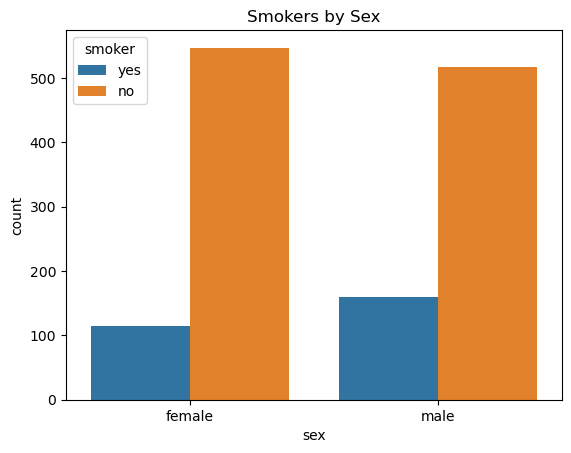

In [12]:
# visualize smoker by sex
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Smokers by Sex");

## Getting the Contingency Table with pd.crosstab

In [13]:
# calculate the contingency table with pd.cross-tab
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


## Final Hypothesis Test

In [14]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result

In [15]:
# What is the p-value?
print(p)
p<.05

0.006548143503580696


True

## Final Conclusion

- Since the p-value < 0.05, I can reject the null hypothesis that there is no relationship between sex and whether or not they smoke. This means that I can accept the alternative hypothesis and conclude that there is a relationship between sex and smoking, and that men are more likely to smoke than women.

# Q3: Do different regions have different charges, on average?

## State the Null and Alternative Hypothesis

- Null Hypothesis: All regions have the same charges, on average.
- Alternative Hypothesis: All regions have different charges, on average.

## Determining the Correct Test

- The data is numeric.
- There are more than 2 groups: various regions
- Which test to perform? One-way ANOVA

## Visualize and Separate Features for Hypothesis

- The target column is 'charges'
- The column that determines the group is 'region'

## Separating the Groups

In [16]:
## Create groups dictionary. There are only 3 groups, but this is even more helpful when there are many groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

## Testing Assumptions

In [17]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [18]:
# checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df

,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


Each region does not have a normal distribution. But because each group has more than 15 samples for 4 groups, I can pass the normality test.

## Testing Assumption of Equal Variance

In [19]:
# with the * operator 
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

The p-value < 0.05, so I can reject the null hypothesis and that there is not equal variance between the groups. Because of this, I will need to use an non-parametric equivalent test. In this case, it will be Kruskal-Wallis test.

## Final One-Way ANOVA Test (alternative)

In [20]:
# perform the correct hypothesis test
# note again the use of the * operator for convenience
result = stats.kruskal( *groups.values())
result

KruskalResult(statistic=4.734181215658743, pvalue=0.19232908072121002)

The p-value is greater than 0.05, but it is currently unclear which regions have a significant difference, so I will need to use Tukey's Pairwise in order to find which regions significantly differ in charges.

## Tukey's Pairwise Multiple Comparisons Test

In [23]:
# save the values as charges and the labels to region
values = df['charges']
labels = df['region']

In [24]:
# perform tukey's multiple comparison test and display the summary
tukeys_results = pairwise_tukeyhsd(values,labels)
tukeys_results.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
northeast,northwest,-988.8091,0.7245,-3428.9343,1451.3161,False
northeast,southeast,1329.0269,0.4745,-1044.9417,3702.9955,False
northeast,southwest,-1059.4471,0.6792,-3499.5723,1380.6781,False
northwest,southeast,2317.8361,0.0583,-54.1994,4689.8716,False
northwest,southwest,-70.638,0.9999,-2508.8826,2367.6066,False
southeast,southwest,-2388.4741,0.0477,-4760.5096,-16.4386,True


From the results above, there is one significant difference in charges between regions. There was a significant difference between the southwest and southeast regions for insurance charges. There were no other differences between any of the other regions.

In conclusion, only 2 regions were significantly different in charges, but neither significantly differed from the other regions of the group.

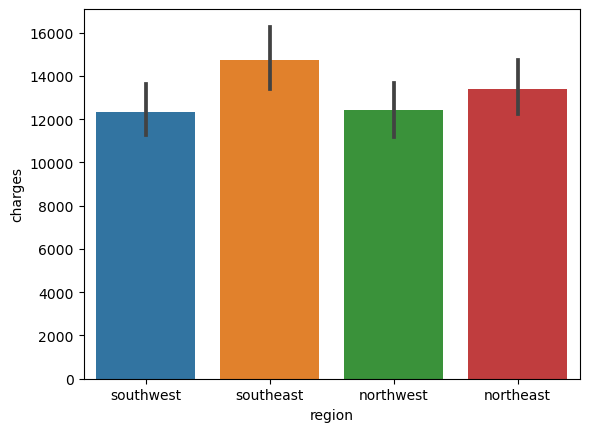

In [25]:
# visual showing charge differences between regions
sns.barplot(data=df, x='region',y='charges');